# MagnetoCaloric Effect (MCE)

The magnetocaloric effect is defined as the heating and cooling of a magnetic material due to the varying of an external magnetic field under isobaric andadiabatic conditions. The effect was first observed in 1881 by a German physicist [Emil Warburg](https://en.wikipedia.org/wiki/Emil_Warburg), followed by French physicist [P. Weiss](https://en.wikipedia.org/wiki/Pierre_Weiss) and Swiss physicist [A. Piccard](https://en.wikipedia.org/wiki/Auguste_Piccard) in 1917.


In order to calculate the MCE, magnetization must be measured as a function of magnetic field and temperature. This allows to obtain the MCE by numerical integration of [Maxwell's relation](https://en.wikipedia.org/wiki/Maxwell_relations).

**Importing libraries**

In [15]:
%matplotlib notebook

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import time

### Data

In [17]:
df_v1 = np.genfromtxt ('MCE Pr0.6Sr0.4Mn0.95Cu0.05O3-v2.dc.dat', delimiter=',')
df = np.delete(df_v1,np.arange (319,334,1),axis=0)

**We grab Magnetization, temperature, and magnetic field information.**

In [18]:
Magnetic_filed = df[0:29,2]
Temperature = df [:,3]
Magnetization = df [:,4]/0.02

**Reshaping the magnetization array into an 2D array**

In [19]:
x = []
for i in np.arange(15,365,10):
    Mag_df = Magnetization [np.where ((Temperature > i-1) & (Temperature < i+1))]
    x.append(Mag_df)

In [20]:
Mag_df = np.asarray(x).T

## Isotherms

**Now we can plot magnetization as a function of magnetic field and temperature.**

**In this work the isothermal magnetization curves are measured as a function of applied field up to 7 T in the temperature
range of 50 K to 370 K with a temperature interval of 10 K.**

<IPython.core.display.Javascript object>


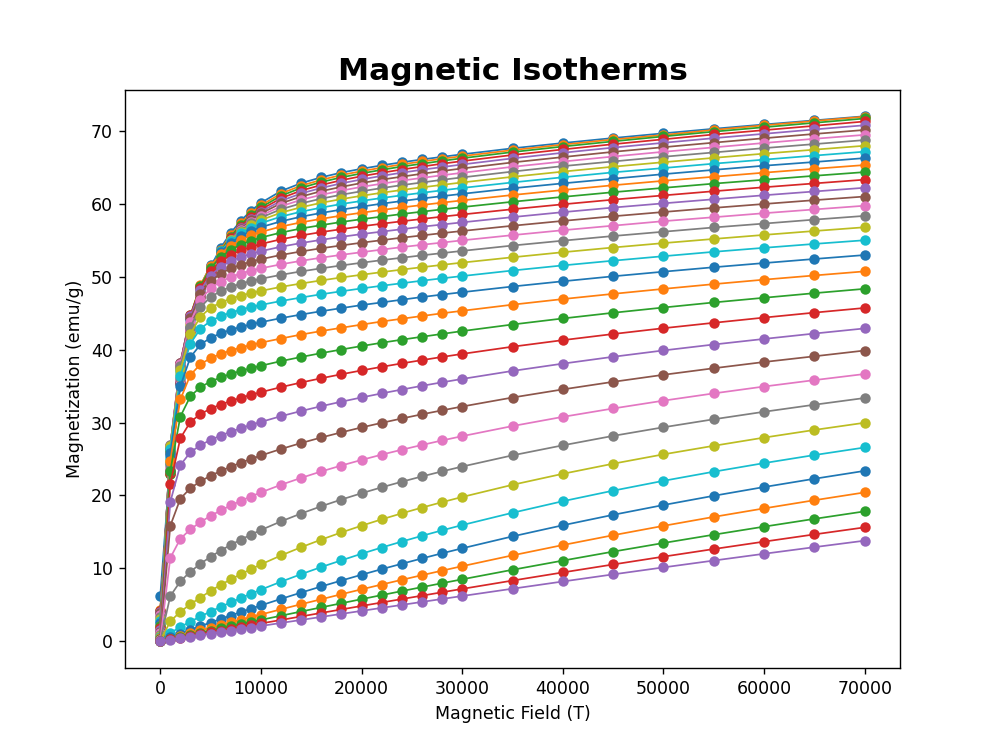

In [21]:
plt.figure(figsize=(8,6))
plt.plot (Magnetic_filed, Mag_df,'-o',markersize=5, linewidth=1)
plt.ylabel ("Magnetization (emu/g)")
plt.xlabel ("Magnetic Field (T)")
plt.title ("Magnetic Isotherms",fontname="Avenir Next LT Pro",size=18,fontweight="bold")
plt.show()

## The Arrott plots

The nature of the magnetic phase transition can be determined on the basis of Arrott plots. Using the [Inoue-Shimizu model](https://iopscience.iop.org/article/10.1088/0305-4608/12/8/021/pdf) the magnetization and the temperature dependence of the magnetic free energy can be expressed as follows:

$$
F = \frac{1}{2} a(T)M^{2} + \frac{1}{4} b(T)M^{4} + \frac{1}{6} c(T)M^{6} - \mu_{0}HM
$$


The coefficients a(T), b(T), and c(T) are the Landau parameters reflecting the thermal variation of the spin fluctuation
amplitude. They can be obtained by linking magnetization and magnetic field using the equilibrium condition ($\frac{dM}{dT} = 0 $) close to the phase transition. Consequently, an equation of state is derived and can be written as:

$$
a(T)M + b(T)M^{3} + c(T)M^{5} = \mu_{0}H
$$


The parameter a(T) indicates the Curie temperature $T_{c}$, and the nature of the magnetic transition is determined by the sign of b(T). Based on [Banerjee's criterion](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6041331/), the positive or negative slope of Arrott plots, b(T), indicate whether the magnetic phase transition is second or first order, respectively.

In [22]:
Mag_arrott = Mag_df ** 2
H_M = Magnetic_filed[:,np.newaxis]/Mag_df

<IPython.core.display.Javascript object>


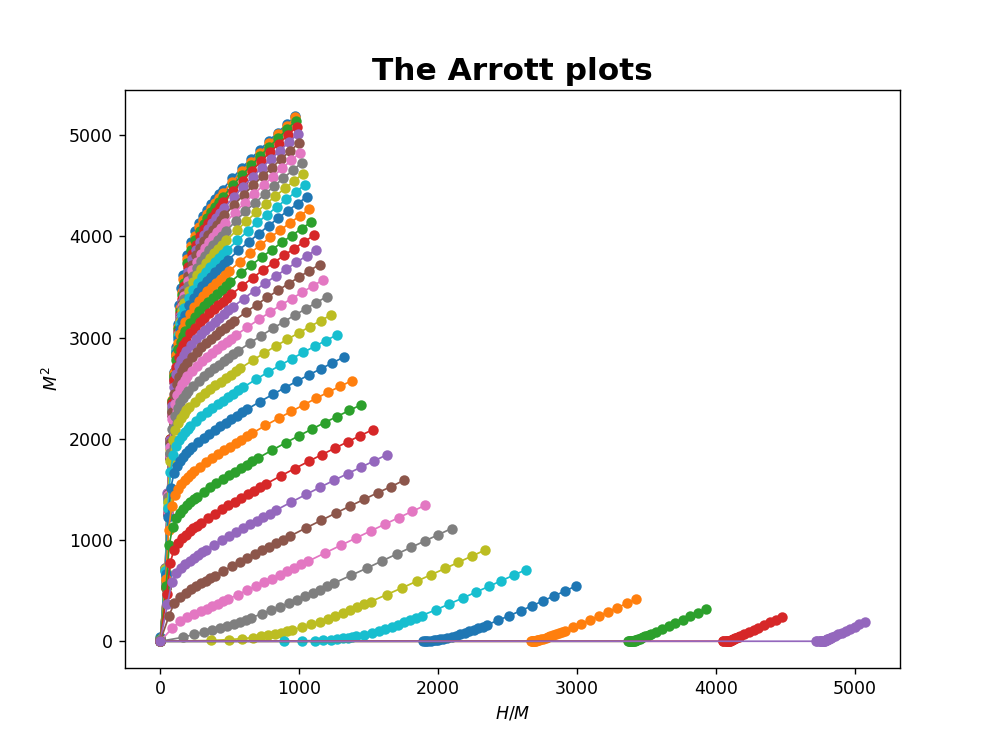

In [23]:
plt.figure(figsize=(8,6))
plt.plot (H_M, Mag_arrott, '-o',markersize=5, linewidth=1)
plt.ylabel ("$M^{2}$")
plt.xlabel ("$H/M$")
plt.title("The Arrott plots",fontname="Avenir Next LT Pro",size=18,fontweight="bold")
plt.show()

## Magnetic entropy change

In order to determine the magnetic entropy change, Maxwell's relation which links the magnetic entropy change to the bulk magnetization (M), the temperature (T), and the external magnetic field (B) can be used through the following equation:

$$
\Delta S_{M} (T,B_{f} \longrightarrow B_{i}) = \int_{B_{i}}^{B_{f}} \left( \frac{\partial M}{\partial T} \right) dB
$$

Since magnetization measurements are usually made at discrete field and temperature intervals, the magnetic entropy change can be written in the numerical form of Maxwell's relation as follow:

$$
\Delta S_{M} (T,B_{f} \longrightarrow B_{i}) = \sum_{i} \frac{M_{i+1}-M_{i}}{T_{i+1}-T_{i}} \Delta B_{i}
$$


From a mathematical point of view, the isothermal entropy change is proportional to the area between two magnetic isotherms.

In [24]:
field_index = [11,16,21,23,25,27,29]

temp_diff = np.diff(np.arange(15,365,10))

field_diff = np.diff (Magnetic_filed)/10000

mag_diff = np.diff(np.delete(Mag_df,0,axis=0))

In [25]:
MCE = (field_diff[:,np.newaxis]*mag_diff)/temp_diff
Middle_Temperature = np.arange(20,360,10)

In [29]:
CumMCEs = list()
CumFields = list()
for i, ind in enumerate(field_index):
    CumMCE = -np.sum(MCE[:ind-1,:],axis = 0)
    CumMCEs.append(CumMCE)
    CumFields.append(np.sum(field_diff[:ind-1]))

data = np.empty((len(Middle_Temperature),len(CumFields)+1))
data[:,0] = Middle_Temperature
for i, CumMCE in enumerate(CumMCEs):
    data[:,i+1] = CumMCE

<IPython.core.display.Javascript object>


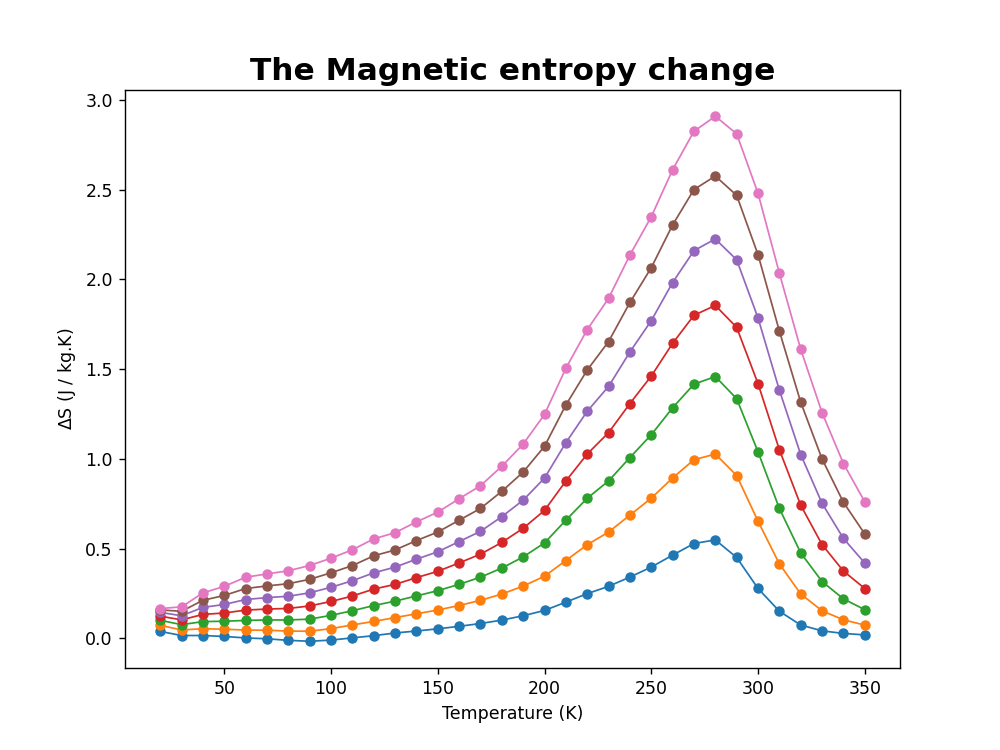

In [30]:
plt.figure(figsize=(8,6))

for CumField, CumMCE in zip(CumFields,CumMCEs):
    plt.plot(Middle_Temperature,CumMCE,marker = 'o',markersize=5, linewidth=1)

plt.xlabel('Temperature (K)')
plt.ylabel('$\Delta$S (J / kg.K)')
plt.title("The Magnetic entropy change",fontname="Avenir Next LT Pro",size=18,fontweight="bold")
plt.show()